第6章里面研究线性回归是把它当作一种拟合的方法，但其实线性回归不仅可以用来做回归任务还可以研究其中的效应。线性回归中每一项权重都是可以构造统计量进行假设检验的。事实上，线性回归模型和方差分析是可以统一的，这也是为什么statsmodels中ols函数既可以用来做方差分析，还可以用来做线性回归。

为什么说线性回归和方差分析是具备统一性的呢？线性回归和方差分析在统计学中都是用来分析因变量和自变量之间的关系，但它们从不同的角度出发。线性回归关注因变量与自变量之间的线性关系，通过回归方程来描述这种关系。而方差分析则关注不同组之间的差异，通过比较不同组的均值来分析组间差异。从结构上来看，线性回归和方差分析其实非常相似。如果将方差分析的模型扩展到包含自变量，就可以看到不同组之间的差异实际上是由自变量的不同水平所引起的。因此，线性回归和方差分析都是描述因变量与自变量之间关系的工具，只是侧重点不同。它们在一定条件下可以相互转化，具备统一性。

线性回归是可以揭示变量之间的作用关系的。它所提供的不仅是一个单纯的折算方法，更可以通过权重分析不同变量的影响大小。通过R2分数也就是拟合优度来评价这一线性模型对数据的拟合效果好坏，R2越高则表明模型效果越好，自变量和因变量之间关系更加明确。而每一项权重的正负可以揭示正相关还是负相关，对应的检验统计量服从t分布，通过对检验统计量的分析可以反映这一个变量的作用是显著的还是不显著的，从而决定是否需要在模型中剔除掉这一变量。尽管从数学原理的角度线性回归是一个朴素的方法，但在人文社会科学中这是一种被广泛应用且无可匹敌的通用方案，很多的回归都基于线性回归进行。如果是在人文社科领域需要数学建模，读者更应该关注简单的OLS如何解释一个好问题。

在Python中，如果想要获得具体的统计分析结果，可以使用statsmodel构造线性回归模型。例如，随机生成一组样本数据，对应的线性回归分析代码如下：

In [2]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
np.random.seed(42)
X = np.random.randn(100, 3)## 100个样本，每个样本有3个特征  
y = X[:, 0] + 2 * X[:, 1] + np.random.rand(100)  # 因变量由前两个特征线性生成，并加入一些噪声  
# 将数据转换为Pandas DataFrame格式  
df = pd.DataFrame(X)
df['y'] = y
# 使用statsmodels进行线性回归  
X = sm.add_constant(df[df.columns[:-1]])
model = sm.OLS(df['y'],X)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1435.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           1.43e-79
Time:                        10:48:53   Log-Likelihood:                -24.500
No. Observations:                 100   AIC:                             57.00
Df Residuals:                      96   BIC:                             67.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5249      0.032     16.239      0.0

在上面的例子中可以看到，因变量y只与第1, 2个自变量有关，但我们想在方程中引入三个自变量。尽管方程的拟合效果比较好，第三个自变量也不应该在方程中出现。如何证明它应当被剔除呢？这里使用了statsmodels的OLS方法。通过add_constant对自变量引入常数项，表明在线性回归方程中是存在常数项的；构造OLS模型并使用fit方法训练模型，然后展示其统计结果如下所示：

从上面的结果来看，R2分数为0.978>0.7，变量存在较为强烈的线性相关关系，且F检验的统计量为1.43e-79<0.05，认为这一线性回归是显著的。针对每一项而言，常数项和前两个变量的系数coef都通过了t检验，唯独第三个变量的系数在进行t检验时概率为0.507>0.05。说明在调整结构时应当将第三个变量剔除出去。

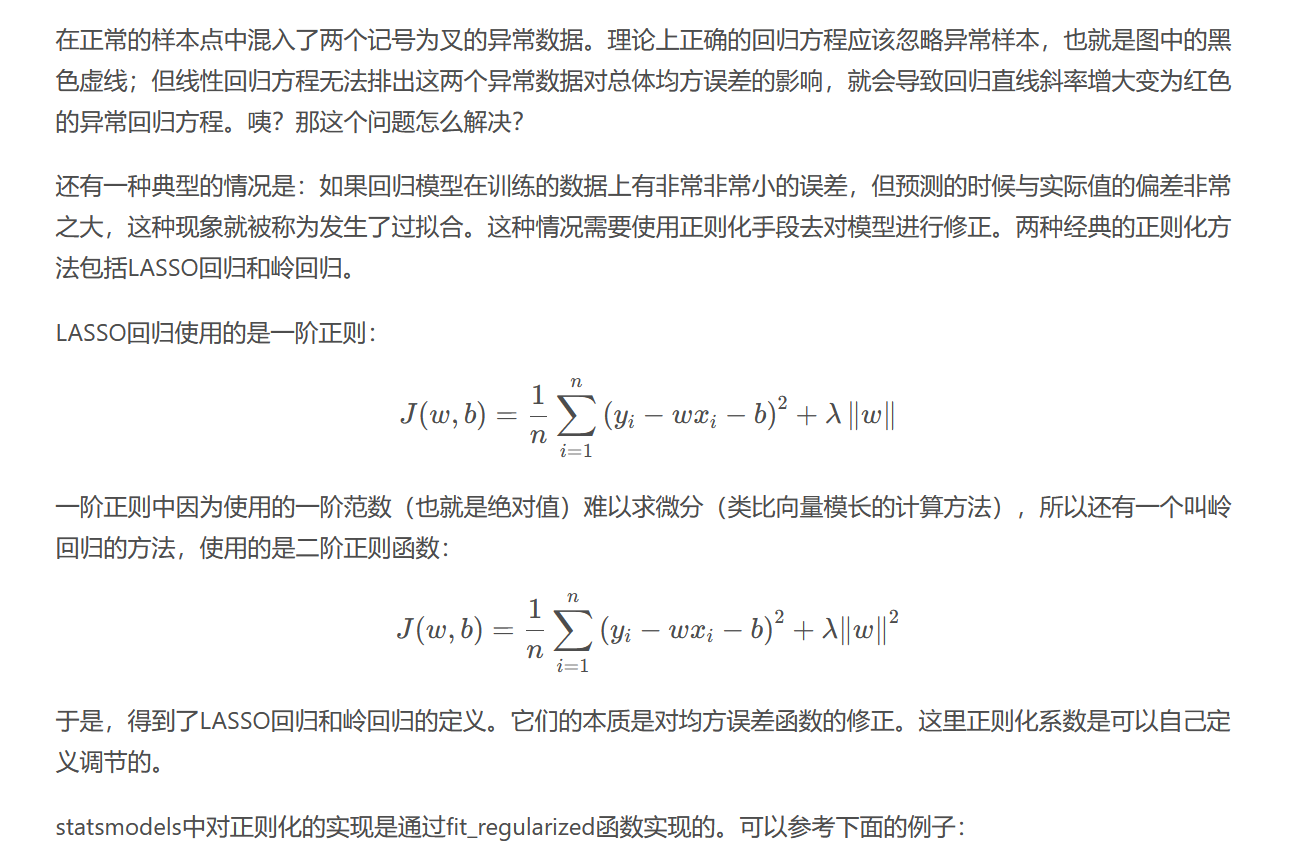

In [3]:
from IPython.display import Image
Image(filename='C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-08-11 105359.png')

In [4]:
import numpy as np  
import statsmodels.api as sm  
x = np.random.rand(100, 3)   
y = x[:, 0] + 2 * x[:, 1] + 3 * x[:, 2] + np.random.rand(100)  
lasso = sm.OLS(y,x).fit_regularized(alpha = 0.1, L1_wt=1)
print(lasso.params)
ridge = sm.OLS(y,x).fit_regularized(alpha = 0.1, L1_wt=0)
print(ridge.params)

[1.14437747 2.10693145 3.23034535]
[1.62852304 2.02503978 2.45694877]


通过对模型的fit_regularized方法实现带正则化的训练。参数alpha为正则化参数，可以自行调节，L1_wt为进行1阶或2阶正则化的选择。若不填写，则默认进行岭回归。另外，在sklearn包中，也在linear_model里集成了Ridge和LASSO方法。

 逻辑回归

在前面的学习中，我们已经看到了：当自变量是离散变量而因变量是连续变量的时候可以通过方差分析来分析自变量操作的不同对因变量分组均值水平的影响。但如果反过来，自变量是连续变量而因变量是离散变量的时候，又该如何处理呢？以最简单的二分变量为例，若自变量是一系列的连续变量而因变量是一个0-1变量，此时如果做线性回归则容易出现斜率暴增的现象。线性回归方程的预测值将会超过(0,1)的范围。这种情况下用什么办法好呢？

分位数回归

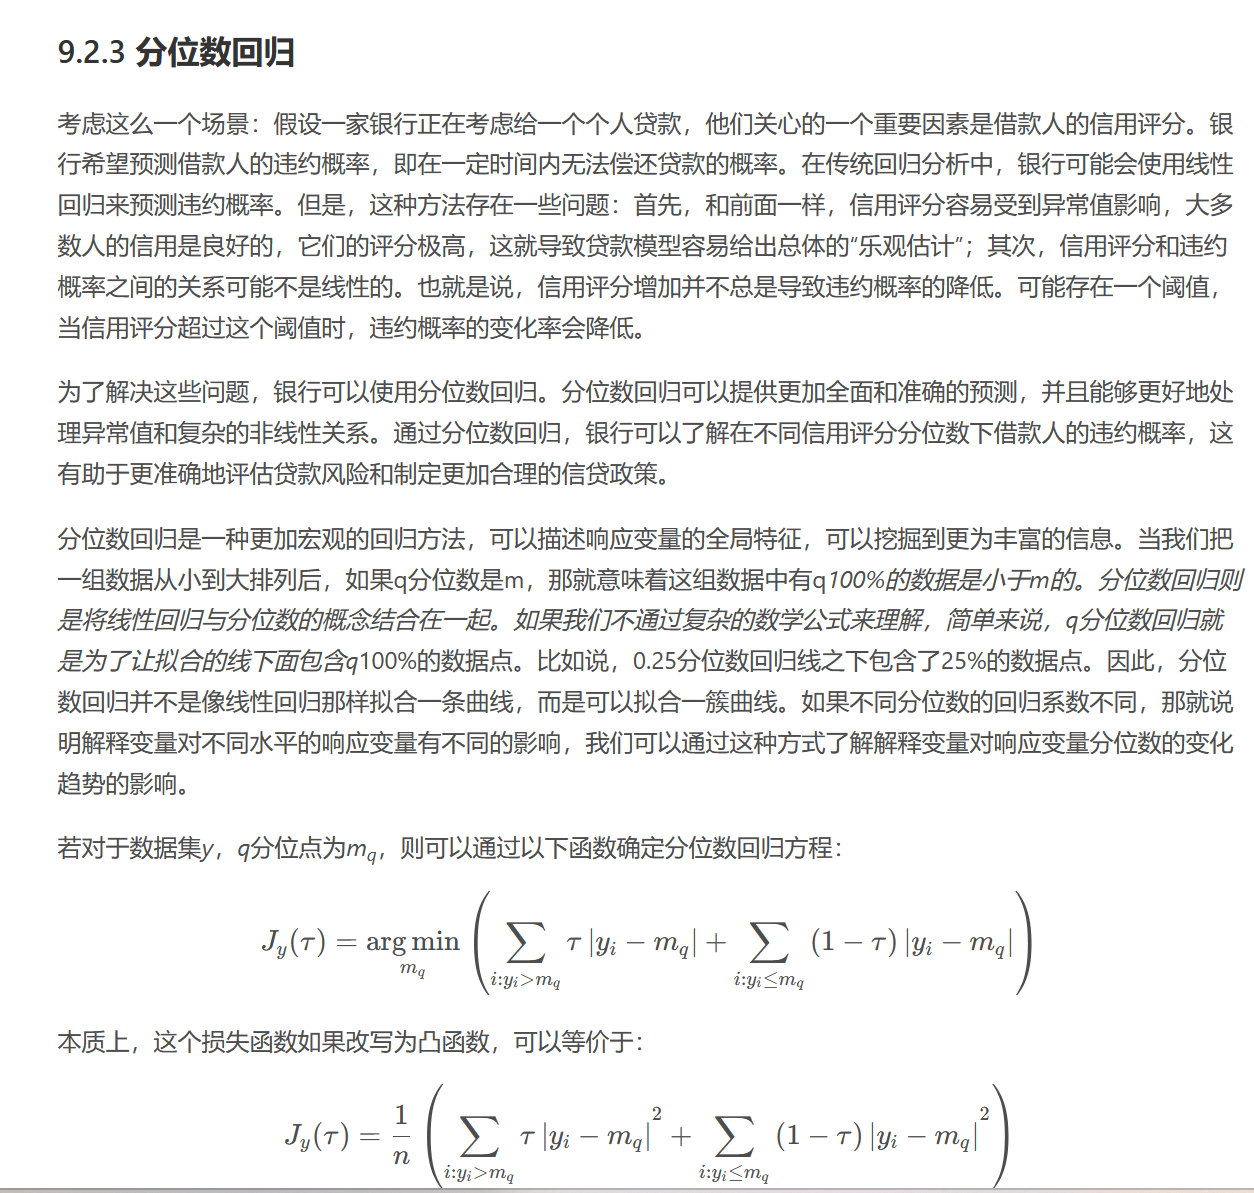

In [6]:
from IPython.display import Image
Image(filename='C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-08-11 111204.png')

从这里就可以看到，它的本质是加权的最小二乘法。q分位数以下的部分赋予更大的权重，以上的部分则赋予更小的权重，对其进行回归即可针对不同的分位点构造不同的方程，分析方程随着分位点的变化。

Python当中可以使用statsmodels执行分位数回归。

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt 
from statsmodels.formula.api import quantreg
import pandas as pd  
data = pd.read_csv('hospital_data.csv')  
plt.scatter(data['hospital'],data['people'])
x=data['hospital']  
# 分位数回归的参数估计  
for q in np.arange(0.1,1,0.2):
    mod = quantreg('people ~ hospital', data)  
    result = mod.fit(q=q)  # 拟合模型   
    # 输出模型摘要信息，包括系数、置信区间等  
    v=result.params
    y=v.Intercept+v.hospital*x
    plt.plot(x,y,label='%.2f分位数'%q)
plt.legend()
plt.xlabel("医院数量（个）")
plt.ylabel("卫生技术人员从业数量(万人)")
plt.grid()
plt.show()

路径分析法与结构方程

结构方程模型（Structural Equation Model，SEM）作为一种多元统计技术，产生后迅速得到普遍应用。20世纪70年代初一些学者将因子分析、路径分析等统计方法整合,提出结构方程模型的初步概念。随后，有研究者进一步发展了矩阵模型的分析技术来处理共变结构的分析问题，提出测量模型与结构模型的概念,促成SEM的发展。Ullman定义结构方程模型为“一种验证一个或多个自变量与一个或多个因变量之间一组相互关系的多元分析程式,其中自变量和因变量既可是连续的,也可是离散的”，突出其验证多个自变量与多个因变量之间关系的特点，该定义具体一定的代表性。

SEM假定一组隐变量之间存在因果关系，隐变量可以分别用一组显变量表示，是某几个显变量中的线性组合。通过验证显变量之间的协方差，可以估计出线性回归模型的系数，从而在统计上检验所假设的模型对所研究的过程是否合适，如果证实所假设的模型合适，就可以说假设隐变量之间的关系是合理的。SEM与一些新近的分析方法相比，也有其独特优势。SEM将不可直接观察的概念,通过隐变量的形式,利用显变量的模型化分析来加以估计,不仅可以估计测量过程中的误差,还评估测量的信度与效度。探讨变量关系的同时,把测量过程产生的误差包含于分析过程之中,把测量信度的概念整合到路径分析等统计推断决策过程。故而在本题中我们采取SEM的方式来进行模型建立与分析，从而找到各变量之间的回归路径，从而得出对于出生人口的影响因素及其影响方式。

结构方程模型它由随机变量和结构参数构成，包括观察变量、潜在变量和误差项三种主要变量类型。

观察变量是可以直接测量和观测的数据，例如考试成绩、问卷调查的响应等。这些变量通常是我们能够直接收集到的定量信息。

潜在变量则代表那些不可直接观测的抽象概念，它们通常涉及心理、教育、社会等领域的复杂构念。例如，智力、满意度或压力等都是潜在变量，它们不能直接测量，但可以通过一系列相关的观察变量来间接衡量。

结构方程模型的强大之处在于，它不仅能够评估单个变量之间的关系，还能够同时分析多个变量之间的复杂关系，包括潜在变量之间的因果关系。这使得SEM成为研究者在社会科学、教育、心理学等多个领域中，分析复杂数据结构和理论模型的有力工具。

结构方程模型的测量模型方程如下所示: 

Python可以使用semopy库计算结构方程。semopy是一个Python库，用于执行结构方程模型分析。它提供了丰富的功能和灵活的用法，使研究人员能够轻松地进行SEM分析并探索复杂数据之间的关系。semopy允许用户根据理论或假设构建结构方程模型，并指定变量之间的关系。提供了详细的结果输出，包括参数估计值、标准误差、置信区间等，以帮助用户解释模型结果。

In [8]:
from semopy import Model
from semopy.examples import holzinger39
data = holzinger39.get_data()
desc = '''
# 定义测量模型
y1 =~ x1 + x2 + x3
y2 =~ x4 + x5 + x6
y3 =~ x7 + x8 + x9
# 定义结构模型
y1 ~ y2 + y3
y2 ~~ y3
'''
mod = Model(desc)
mod.fit(data)
# 检验模型，输出每个参数的估计值、标准误等统计信息
estimates = mod.inspect()
print(estimates)


   lval  op rval  Estimate  Std. Err    z-value   p-value
0    y1   ~   y2  0.321527  0.067313   4.776602  0.000002
1    y1   ~   y3  0.537872  0.129582   4.150826  0.000033
2    x1   ~   y1  1.000000         -          -         -
3    x2   ~   y1  0.553606  0.099671   5.554318       0.0
4    x3   ~   y1  0.729309  0.109115   6.683854       0.0
5    x4   ~   y2  1.000000         -          -         -
6    x5   ~   y2  1.113106  0.065429  17.012339       0.0
7    x6   ~   y2  0.926111  0.055454  16.700597       0.0
8    x7   ~   y3  1.000000         -          -         -
9    x8   ~   y3  1.180314  0.165065   7.150608       0.0
10   x9   ~   y3  1.081410  0.151173   7.153469       0.0
11   y2  ~~   y3  0.173360  0.049306   3.515991  0.000438
12   y2  ~~   y2  0.979415  0.112101   8.736882       0.0
13   y1  ~~   y1  0.537124  0.117209   4.582637  0.000005
14   y3  ~~   y3  0.383711  0.086208   4.450974  0.000009
15   x1  ~~   x1  0.549036  0.113616   4.832405  0.000001
16   x2  ~~   

最终得到的概率值显示，这样的路径关系是成立的。最终得到的y1 y2 y3三个隐变量可以作为一种因子测量方式。可能看到这里大家就想起来了，隐变量的结构怎么和因子分析这么像呢，对了，它本身就可以看作是因子分析的一种扩展。不仅可以抽象成多个因子，还可以分析原始变量之间的影响路径和因子之间的影响路径。不仅可以分析数据集中存在的变量之间的作用关系，还可以探究数据集中不存在的更抽象的变量如何进行换算。这确确实实是人文社会科学研究中的重大杀器。

内生性问题与因果推断

让我们回到之前讨论抽烟与肺癌的例子上来。观察到的数据中，既有吸烟的人也有不吸烟的人，我们发现吸烟的人中有很多得了肺癌。这时，我们可能会认为吸烟是导致肺癌的原因。但是，这里有一个问题：那些选择吸烟的人可能与那些容易患肺癌的人有一些共同的特征或习惯，而不仅仅是吸烟导致肺癌。换句话说，可能是那些人本身的某种特质或习惯导致了他们既选择吸烟又容易患肺癌，而不是吸烟直接导致肺癌。这就产生了所谓的“内生性问题”，也让我们把目光聚焦到因果关系上来。在实际生活中，我们更关心的是因果关系，因为它能为我们提供改变和预测事物发展的依据。比如，如果吸烟是导致肺癌的真正原因，那么劝人们戒烟就有可能降低肺癌的发病率。

格兰杰因果检验是一种用于检验两个时间序列变量之间是否存在因果关系的统计方法。它基于这样的基本思想：如果一个变量是另一个变量的原因，那么在控制其他变量的影响后，它应该能够“预测”另一个变量的变化。格兰杰因果检验通常用于时间序列数据，数据特征包括时间序列的平稳性和非白噪音特性。其流程包括单位根检验、协整检验和误差修正模型建立等步骤。通过格兰杰因果检验，我们可以判断一个变量是否是另一个变量的格兰杰原因，即是否存在一种因果关系，这种关系是在考虑了其他所有可能的影响因素后得出的。使用statsmodels执行格兰杰因果检验通过grangercausalitytests函数实现，例如，参考下面这段代码：

In [10]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests  
np.random.seed(12345)  
n = 100  
X = np.random.normal(size=(n, 2))  
# 添加一些时间趋势  
X[:, 0] = np.cumsum(X[:, 0])  
X[:, 1] = np.cumsum(X[:, 1]) + np.cumsum(X[:, 0])
# 格兰杰因果检验  
results = grangercausalitytests(X, maxlag=2)  
print("--------------------------------")  
print(f"Variable 1 Granger causes Variable 2:")  
print(results[1][0]['ssr_ftest'][1])  # F-statistic  
print(results[1][0]['ssr_ftest'][0])  # p-value  
print("--------------------------------")
print(f"Variable 2 Granger causes Variable 1:")  
print(results[2][0]['ssr_ftest'][1])  # F-statistic  
print(results[2][0]['ssr_ftest'][0])  # p-value  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0111  , p=0.9162  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.0115  , p=0.9146  , df=1
likelihood ratio test: chi2=0.0115  , p=0.9147  , df=1
parameter F test:         F=0.0111  , p=0.9162  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8737  , p=0.4208  , df_denom=93, df_num=2
ssr based chi2 test:   chi2=1.8413  , p=0.3983  , df=2
likelihood ratio test: chi2=1.8242  , p=0.4017  , df=2
parameter F test:         F=0.8737  , p=0.4208  , df_denom=93, df_num=2
--------------------------------
Variable 1 Granger causes Variable 2:
0.9161670277103486
0.011138829187903179
--------------------------------
Variable 2 Granger causes Variable 1:
0.42080550846766285
0.8736910565604967


在这段代码中，我们生成了两个随时间变化的正态分布随机变量X。然后，我们使用grangercausalitytests函数进行格兰杰因果检验。最后，我们输出了每个变量对其他变量的格兰杰因果关系的F统计量和p值。结果显示，变量1是变量2的原因，因为检验概率为0.01<0.05满足置信度要求。

    二重差分是一种用于处理非平稳时间序列数据的统计方法。它的作用是消除时间序列中的趋势和季节性影响，以识别和估计纯粹由循环因素引起的变动。基本思想是通过两次差分将非平稳序列转换为平稳序列，从而能够应用传统的平稳时间序列分析方法。二重差分本身并不直接用于因果推断，但它可以作为因果推断分析中的一个组成部分。通过消除时间序列数据中的趋势和季节性影响，二重差分可以帮助更好地识别和估计变量之间的因果关系。在进行因果推断时，我们通常关注的是两个或多个变量之间的纯效应，即排除了其他潜在影响因素之后，一个变量对另一个变量的直接影响。为了更准确地估计这种因果关系，我们需要确保所分析的时间序列数据是平稳的，以避免由于趋势和季节性影响导致的偏差。通过二重差分处理，我们可以将非平稳时间序列转换为平稳序列，从而能够更准确地估计因果关系。
    断点回归是一种用于因果推断的统计方法。它通过识别一个或多个“断点”来分析变量之间的因果关系。断点回归的作用在于利用数据中的非随机变化来估计因果效应。数据特征通常包括一个或多个断点，以及断点附近的数据分布情况。基本思想是利用断点作为自然实验的边界条件，将数据分为两部分：受断点影响的观察值和不受影响的观察值。通过比较这两组观察值的变化趋势，可以推断出因果效应。断点回归的流程包括确定断点、估计因果效应和检验断点的有效性。首先，需要确定一个或多个断点，这些断点通常是根据某种规则或阈值来确定的。然后，通过回归分析或其他统计方法来估计因果效应的大小和方向。最后，通过一系列检验来确认断点的有效性，以排除其他潜在的干扰因素。在Python中，同样可以通过OLS研究断点回归：

In [11]:
import numpy as np  
import statsmodels.api as sm   
# 创建一些示例数据  
n = 1000  
X = np.random.normal(size=n)  
Y = 3 * X + np.random.normal(size=n)  # 假设Y是X的线性函数，并加入一些噪音  
# 定义断点  
cutoff = 0.5  
X_cut = X[X > cutoff]  
X_not_cut = X[X <= cutoff]  
Y_cut = Y[X > cutoff]  
Y_not_cut = Y[X <= cutoff]  
# 拟合线性回归模型  
X_cut_model = sm.add_constant(X_cut)  # 添加常数项  
model = sm.OLS(Y_cut, X_cut_model)  
results = model.fit()    
# 输出结果  
print("Coefficients: ", results.params)  # 输出系数，即因果效应的大小和方向  
print("P-value: ", results.pvalues[0])  # 输出p值，用于检验系数的显著性  
# 进行假设检验，以检验断点是否显著影响Y的值  
p_value = results.pvalues[0]  # p值用于检验断点是否存在显著影响  
if p_value < 0.05:  # 如果p值小于0.05，我们拒绝原假设，接受对立假设，认为存在因果关系  
    print(f"存在显著因果关系")  
else:  # 如果p值大于或等于0.05，我们不能拒绝原假设，认为不存在因果关系或证据不足  
    print(f"不存在显著因果关系")


Coefficients:  [0.06037695 3.02696511]
P-value:  0.6711531326773922
不存在显著因果关系


在因果推断研究中，断点回归的一个关键应用是处理选择性偏差（Selection Bias）。选择性偏差是由于样本选择不当而导致的结果偏差。通过利用断点回归，可以更好地控制选择性偏差，从而更准确地估计因果效应。此外，断点回归还可以用于处理观察性研究中的混杂因素，通过识别和利用断点来控制潜在的混淆变量，从而提高因果推断的准确性。

    工具变量在因果推断中起着至关重要的作用。它被用来解决因果推断中的内生性问题，即由于数据中存在的遗漏变量、反向因果关系或测量误差等原因导致的估计偏误。工具变量的基本思想是通过一个与内生解释变量相关，但又与误差项无关的变量来影响内生解释变量，从而使得因果关系的估计更为准确。在使用工具变量时，需要找到一个合适的工具变量，以满足与内生解释变量的相关性、与误差项的无关性以及影响内生解释变量的条件。工具变量的使用流程通常包括选择工具变量、检验工具变量的有效性以及进行因果关系的估计。构造工具变量的方法多种多样，可以根据具体的研究问题和数据特征来选择合适的工具变量。常见的构造工具变量的方法包括使用自然实验、使用固定效应模型、使用广义矩估计等。